<a href="https://colab.research.google.com/github/amitkrjha1994/Cotton-Disease-Detection-Using-CNN/blob/main/Cotton_Disease_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D

In [6]:
train_data_dir='/content/drive/My Drive/Colab Notebooks/Cotton Disease Pridiction/train'
test_data_dir='/content/drive/My Drive/Colab Notebooks/Cotton Disease Pridiction/val'

In [7]:
IMAGE_SIZE=[224,224]
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [9]:
test_set=test_datagen.flow_from_directory(test_data_dir,target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [11]:
from keras.preprocessing.image import load_img,img_to_array


Text(0.5, 1.0, 'Diseased Image')

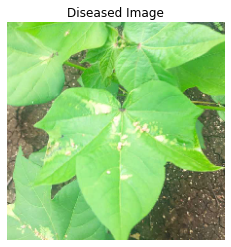

In [14]:
image_path='/content/drive/My Drive/Colab Notebooks/Cotton Disease Pridiction/train/diseased cotton leaf/dis_leaf (1)_iaip.jpg'
new_img = load_img(image_path, target_size=(224, 224))
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title("Diseased Image")

Text(0.5, 1.0, 'Fresh Leaf')

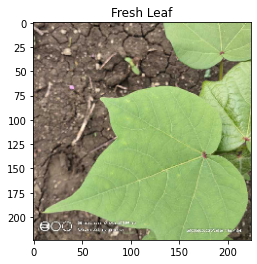

In [15]:
fresh_img='/content/drive/My Drive/Colab Notebooks/Cotton Disease Pridiction/train/fresh cotton leaf/d (10)_iaip.jpg'
new_img=load_img(fresh_img,target_size=(224,224))
plt.figure(figsize=(4,4))
plt.imshow(new_img)
plt.title("Fresh Leaf")

In [16]:
model=Sequential()

In [18]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 107, 107, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 51, 51, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0

In [20]:
from keras import layers

In [25]:
model.add(Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 107, 107, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 51, 51, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0

In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
model.fit_generator(training_set,
                    validation_data=test_set,
                    epochs=10,
                    steps_per_epoch=len(training_set),
                    validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
122/122 [==============================] - 972s 8s/step - loss: 1.0782 - accuracy: 0.5484 - val_loss: 1.0698 - val_accuracy: 0.4877
Epoch 2/10
122/122 [==============================] - 36s 293ms/step - loss: 0.8766 - accuracy: 0.6571 - val_loss: 0.7613 - val_accuracy: 0.6852
Epoch 3/10
122/122 [==============================] - 36s 297ms/step - loss: 0.7275 - accuracy: 0.7017 - val_loss: 0.6530 - val_accuracy: 0.7747
Epoch 4/10
122/122 [==============================] - 36s 298ms/step - loss: 0.5650 - accuracy: 0.7699 - val_loss: 0.4990 - val_accuracy: 0.8025
Epoch 5/10
122/122 [==============================] - 36s 299ms/step - loss: 0.4792 - accuracy: 0.7991 - val_loss: 0.4444 - val_accuracy: 0.8395
Epoch 6/10
122/122 [==============================] - 36s 296ms/step - loss: 0.4687 - accuracy: 0.8088 - val_loss: 0.3970 - val_accuracy: 0.8333
Epoch 7/10
122/122 [==============================] - 37

In [31]:
model.save('/content/drive/My Drive/Colab Notebooks/Cotton Disease Pridiction/model.h5')

In [52]:
img_path='/content/drive/My Drive/Colab Notebooks/Cotton Disease Pridiction/test/diseased cotton leaf/dis_leaf (124).jpg'
img=load_img(img_path,target_size=(224,224))
x=img_to_array(img)
x.shape

(224, 224, 3)

In [53]:
x=x/255

In [54]:
x.shape

(224, 224, 3)

In [55]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 224, 224, 3)

In [56]:
model.predict(x)

array([[9.9999690e-01, 2.9429430e-06, 6.0357624e-10, 1.3546240e-07]],
      dtype=float32)